### Imports


In [1]:
import numpy as np
import librosa
import copy
from sklearn.decomposition import PCA
import IPython
import IPython.display as ipd
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from heapq import heappush
import heapq
import collections
import pandas as pd

In [2]:
root = "data/"

### Instantaneous Source Separation

In [3]:
rates = []
audios = []

for i in range(1,21):
    X,rate = librosa.load(root + "x_ica_"+str(i)+".wav",sr=None)
    audios.append(X)
    rates.append(rate)


In [4]:
audios = np.array(audios)
print(audios.shape)
rates = np.array(rates)

(20, 76800)


In [5]:
def perform_pca(files,k):
    pca = PCA(n_components=k,whiten = True)       
    X = np.transpose(pca.fit_transform(np.transpose(files)))  
    return pca.explained_variance_,X

In [6]:
var, audio = perform_pca(audios,4)


In [7]:
var

array([0.19044342, 0.03013676, 0.01315544, 0.00570161])

In [8]:
N = 76800
I = np.identity(4)
W = np.identity(4)

Y = np.dot(W,audio)
lr = 1e-7
determ = []

In [9]:

for i in range(0,500):
    prev_W = W
    W_delta = (N*I - np.dot(np.tanh(Y),np.transpose(np.power(Y,3))))*prev_W
    W = W + lr*W_delta
    Y = np.dot(W,audio)
    d = np.abs(prev_W - W)
    det = np.linalg.det(d)
    determ.append(det)
    if np.allclose(W,prev_W,rtol=1e-05, atol=1e-05):
        print("Converged at",i)    
        break

Converged at 208


The final separated source recordings are as below

In [10]:
for y in Y:
    ipd.display(ipd.Audio(y, rate = 16000))

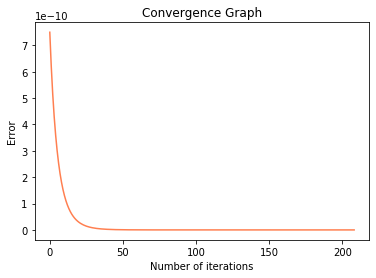

In [11]:
X = np.arange(0,len(determ))
sns.lineplot(x = X,y=determ,color = "coral")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.title("Convergence Graph") ;